In [1]:
%matplotlib inline
import matplotlib.pyplot as plt, mpld3, glob, os
import pandas as pd, seaborn as sn, numpy as np
sn.set_context('talk')

# Krypsiv temperatures

Kate has asked if I can summarise the HOBO logger temperature data, including:

 * Plots of min, max, median and mean temperature per month at each location. <br><br>
 
 * Tests for temperature differences between nuisance and non-nuisance sites on each of the 3 rivers.
 
See e-mail received 09/11/2016 at 10:42 for details.

## 1. Box plots per location

The tidied temperature data for each site is here:

C:\Data\James_Work\Staff\Therese_FM\Bulbous_Rushes\Data\Tidied\stage_and_temp

In [2]:
# Read station properties
stn_xls = r'C:\Data\James_Work\Staff\Therese_FM\Bulbous_Rushes\Data\Tidied\proportions.xlsx'
stn_df = pd.read_excel(stn_xls, sheetname='site_type')

stn_df.head()

,Kortnavn,Name,Type,Elv_
0,LOG,LOG,Referanse,Mandalselva
1,ÅSE,ASE,Problemvekst,Mandalselva
2,SVE,SVE,Problemvekst,Mandalselva
3,SME,SME,Referanse,Mandalselva
4,FYG,FYG,Problemvekst,Mandalselva


In [3]:
# Read temp data

# Data folder
data_fold = r'C:\Data\James_Work\Staff\Therese_FM\Bulbous_Rushes\Data\Tidied\stage_and_temp'

# Site names
stns = ['APA', 'ASE', 'BJO', 'BRO', 'DRA', 'FYG', 
        'HER', 'HIL', 'KIL', 'LOG', 'MID', 'OSE', 
        'SME', 'SOR', 'STR', 'SVE', 'VAL', 'VEN']

df_list = []

# loop over sites
for stn in stns:
    # Some sites only have data for 2015
    if stn in ('VEN', 'SME'):
        # Read just 2015 data
        path_2015 = os.path.join(data_fold, '%s_2015.csv' % stn)
        df = pd.read_csv(path_2015, index_col=0, 
                         parse_dates=True,
                         dayfirst=True,
                         delimiter=';')
    
    else: # Have files for 2015 and 2016
        # 2015
        path_2015 = os.path.join(data_fold, '%s_2015.csv' % stn)
        df_2015 = pd.read_csv(path_2015, index_col=0, 
                              parse_dates=True,
                              dayfirst=True,
                              delimiter=';')      

        # 2016
        path_2016 = os.path.join(data_fold, '%s_2016.csv' % stn)
        df_2016 = pd.read_csv(path_2016, index_col=0, 
                              parse_dates=True,
                              dayfirst=True,
                              delimiter=';')  
      
        # Concatenate
        df = pd.concat([df_2015, df_2016], axis=0)
        
    # Remove level
    del df['level_m']
       
    # Drop any NoData values
    df.dropna(how='any', inplace=True)
    
    # Extract months
    df[u'Måned'] = df.index.month
    
    # Add site properties
    df['site'] = stn
    df['Elv'] = stn_df[stn_df['Name']==stn]['Elv_'].iloc[0]
    df['Type'] = stn_df[stn_df['Name']==stn]['Type'].iloc[0]
    
    # Tidy up
    df.reset_index(inplace=True, drop=True)
    df['Temperatur (C)'] = df['temp_C']
    del df['temp_C']
    
    # Append to output
    df_list.append(df)

# Concat
df = pd.concat(df_list, axis=0)
del df_list

df.head()

,Måned,site,Elv,Type,Temperatur (C)
0,7,APA,Tovdalselva,Problemvekst,22.717
1,7,APA,Tovdalselva,Problemvekst,22.046
2,7,APA,Tovdalselva,Problemvekst,21.569
3,7,APA,Tovdalselva,Problemvekst,21.282
4,7,APA,Tovdalselva,Problemvekst,21.760


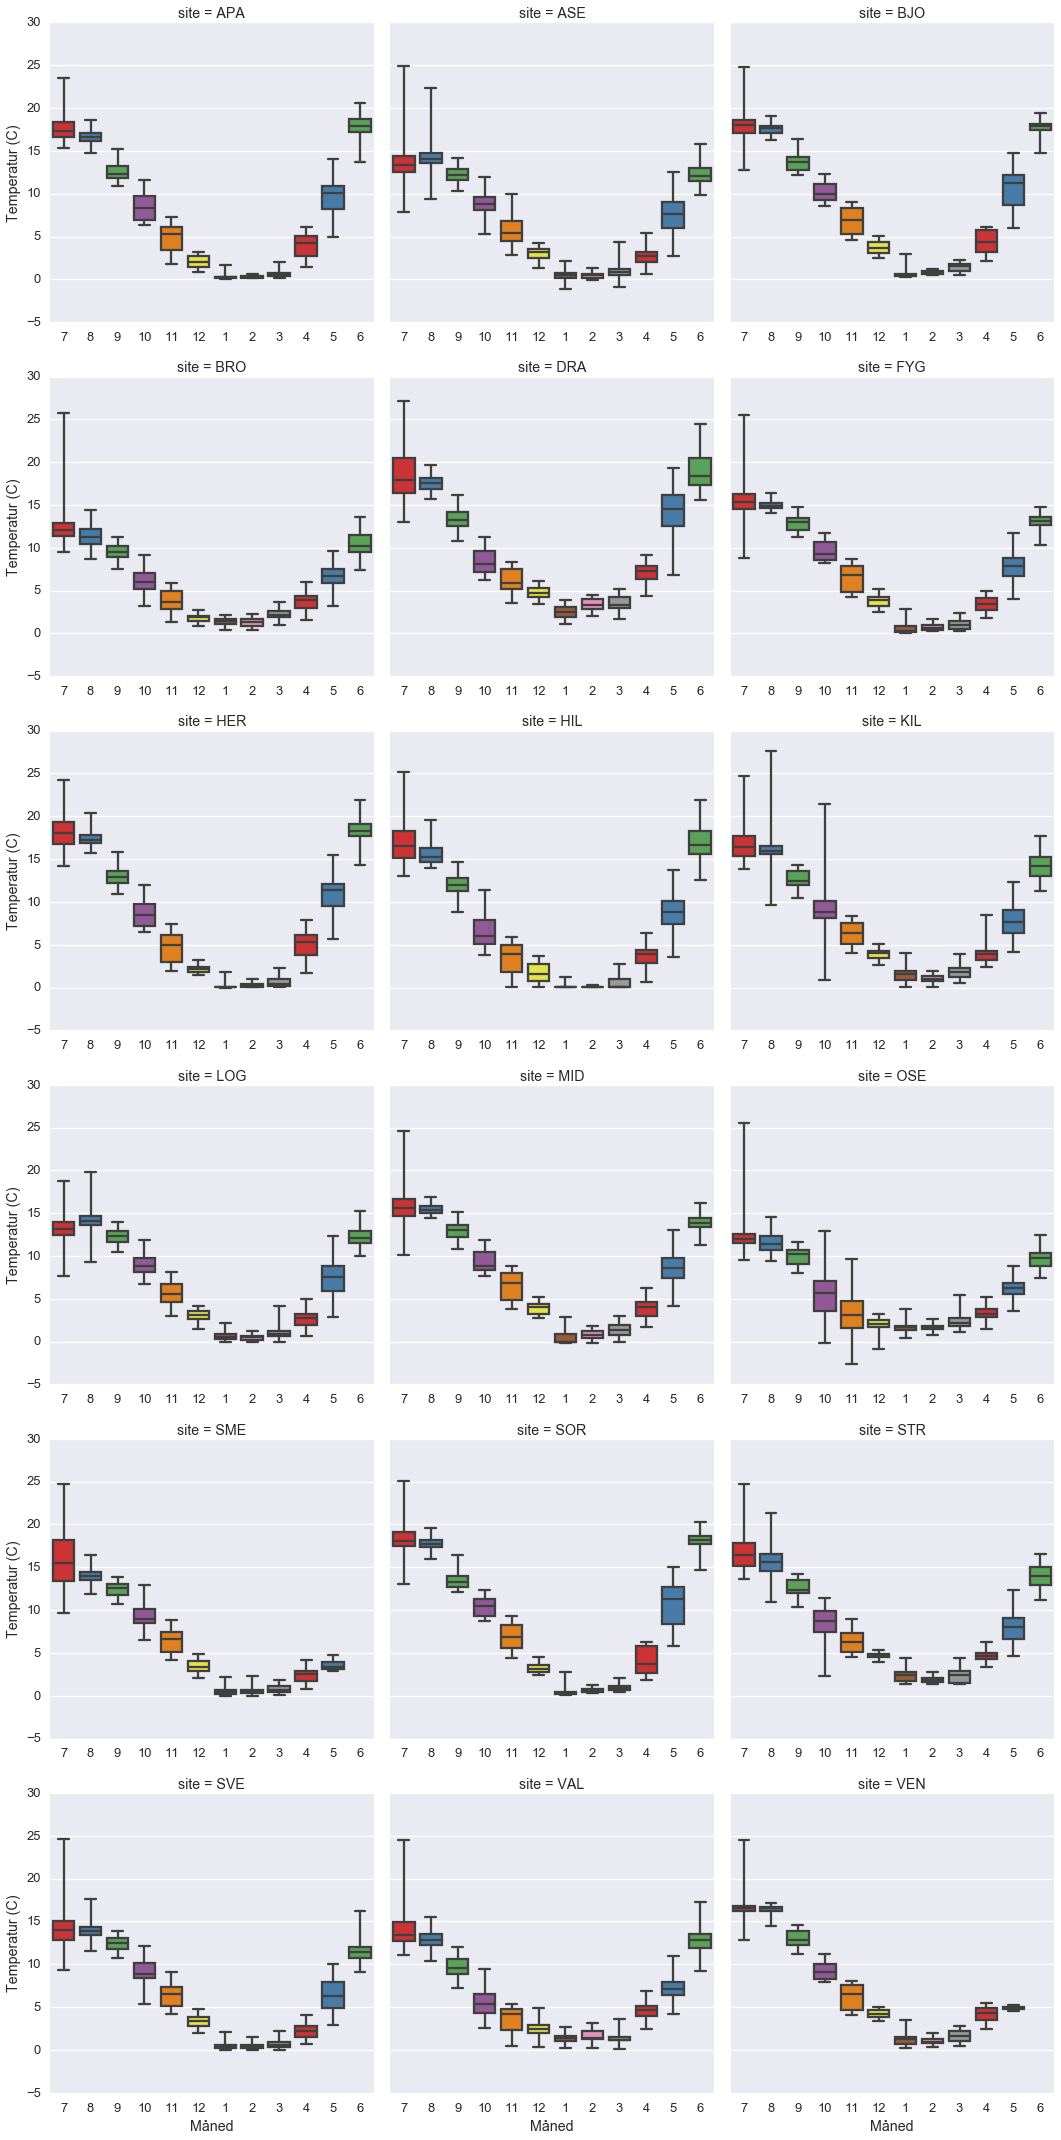

In [4]:
# Plot
g = sn.factorplot(x=u'Måned', y='Temperatur (C)',
                  col='site', col_wrap=3,
                  data=df, 
                  kind='box',
                  order=[7, 8, 9, 10, 11, 12, 1, 2, 3, 4, 5, 6],
                  whis=np.inf,
                  sharex=False,
                  sharey=True,
                  palette='Set1',
                  size=5)

plt.tight_layout()

# Save
out_fold = r'C:\Data\James_Work\Staff\Therese_FM\Bulbous_Rushes\Plots'
out_path = os.path.join(out_fold, 'temp_by_month.png')
plt.savefig(out_path, dpi=300)

## 2. Nuisance versus non-nuisance per river

### 2.1. Just by river

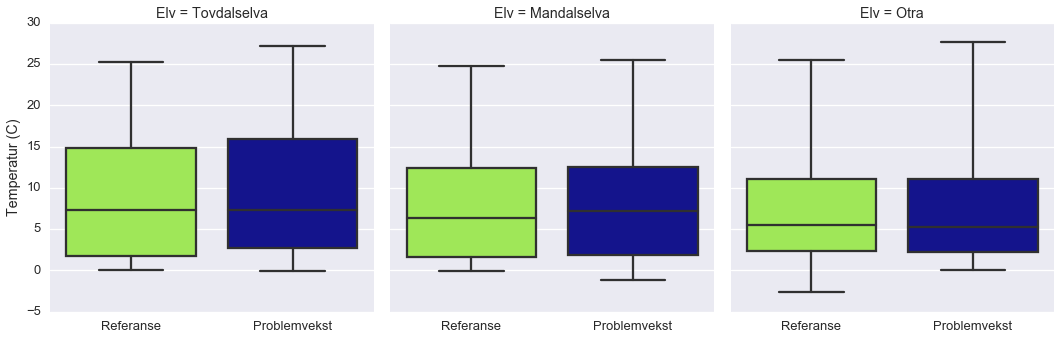

In [5]:
# Plot
g = sn.factorplot(x='Type', y='Temperatur (C)',
                  col='Elv', 
                  data=df, 
                  kind='box',
                  order=['Referanse', 'Problemvekst'],
                  whis=np.inf,
                  sharex=False,
                  sharey=True,
                  palette={'Referanse':'#9FFF40',
                           'Problemvekst':'#0000A0'},
                  size=5)

g.set(xlabel='')
plt.tight_layout()

# Save
out_fold = r'C:\Data\James_Work\Staff\Therese_FM\Bulbous_Rushes\Plots'
out_path = os.path.join(out_fold, 'temp_by_type_riv.png')
plt.savefig(out_path, dpi=300)

### 2.2. By river and month

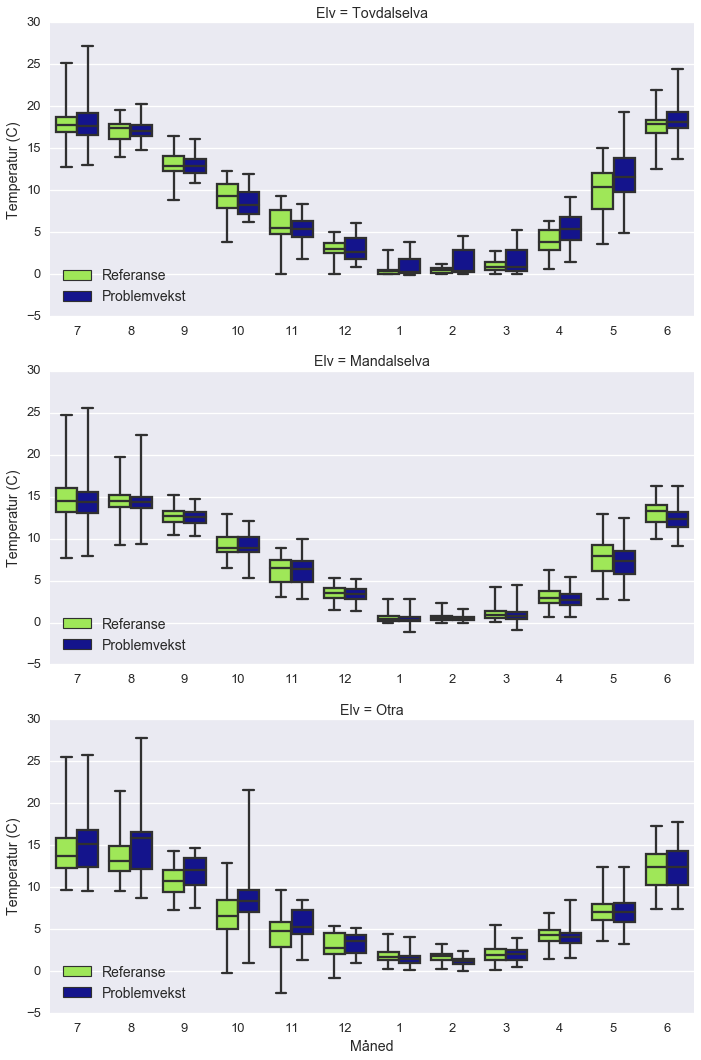

In [6]:
# Plot
g = sn.factorplot(x=u'Måned', y='Temperatur (C)', hue='Type',
                  row='Elv', 
                  data=df, 
                  kind='box',
                  order=[7, 8, 9, 10, 11, 12, 1, 2, 3, 4, 5, 6],
                  hue_order=['Referanse', 'Problemvekst'],
                  whis=np.inf,
                  sharex=False,
                  sharey=True,
                  palette={'Referanse':'#9FFF40',
                           'Problemvekst':'#0000A0'},
                  size=5,
                  aspect=2,
                  legend=False)

g.axes[0, 0].legend(loc='lower left', fontsize=14)
g.axes[1, 0].legend(loc='lower left', fontsize=14)
g.axes[2, 0].legend(loc='lower left', fontsize=14)

plt.tight_layout()

# Save
out_fold = r'C:\Data\James_Work\Staff\Therese_FM\Bulbous_Rushes\Plots'
out_path = os.path.join(out_fold, 'temp_by_month_type_riv.png')
plt.savefig(out_path, dpi=300)

## 3. Reformatting of 2016 data

The 2016 lab data has now been received, but need reformatting to be compatible with previous results (and my code in *krypsiv_2.ipynb*). The raw lab data is here:

K:\Avdeling\318 Ferskvannsøkologi\Prosjekter\2016 JBovervåk16-18 (TFM)\03 Vannprøver\data_2016_11_09_KAH.xlsx

I've made a copy of this file (*Chem_2016_11_09_KAH_JES.xlsx*) and then removed the blank columns, tidied up the units and **replaced values at the limit of detection with the detection limit itself**. The code below transforms this data into something compatible with my earlier code.

In [7]:
# Read tidied data
in_xls = r'C:\Data\James_Work\Staff\Therese_FM\Bulbous_Rushes\Data\Tidied\Chem_2016_11_09_KAH_JES.xlsx'
df = pd.read_excel(in_xls, sheetname='WaterChemistry')

df.head()

,kortnavn,name,type,Fe (µg/l),CO2 (mg C/L),NH4 (µg N/l),NO3+NO2 (µg N/l),pH,PO4 (µg P/l),SO4 (mg/l),TOC (mg C/l),TOTP (µg P/l)
0,ÅPÅ,APA,Water,NaN,0.40,14.0,78.0,NaN,1.0,0.77,3.5,2.0
1,ÅPÅ,APA,Water,NaN,0.43,7.0,22.0,NaN,1.0,0.72,3.4,2.0
2,ÅPÅ,APA,Water,NaN,0.34,7.0,24.0,5.77,1.0,0.69,3.8,3.0
3,ÅPÅ,APA,Pore water,5250.0,11.20,38.0,32.0,NaN,4.0,NaN,NaN,11.0
4,ÅPÅ,APA,Water,NaN,0.51,6.0,33.0,NaN,1.0,NaN,NaN,3.0


In [8]:
# Average data for each site and sample type
grpd = pd.groupby(df, by=['name', 'type'])
df = grpd.agg('mean')
df.reset_index(inplace=True)

# Convert to long format
df = pd.melt(df, id_vars=['name', 'type'])

# Build new column names
df['par'] = df['type'] + df['variable']
del df['type'], df['variable']

# Pivot
df = df.pivot(index='name', columns='par', values='value')

# Save
out_path = r'C:\Data\James_Work\Staff\Therese_FM\Bulbous_Rushes\Data\Tidied\chem_2016_tidied.csv'
df.to_csv(out_path, encoding='utf-8')